Python Visualizations: Taken from: https://www.coursera.org/learn/python-for-data-visualization/

In [1]:
%matplotlib inline

### Backend Layer:

#### Matplotlib Backend-Layer:  

- <b>FigureCanvas</b>: matplotlib.backend_bases.FigureCanvas. the area onto which the figure is drawn.
- <b>Renderer</b>: matplotlib.backend_bases.Renderer. knows how to plot on the canvas.
- <b>Event</b>: matplotlib.backend_bases.Event. handles user-input as keystrokes and mouse clicks.

#### Matplotlib Artist-Layer:  

- <b>Artist</b>: knows how to use the Renderer to plot on the Canvas. Titles, Lines, ticks, images, etc.  
    - <b>Primitive Artist</b>: Line2d, Rectangle, Circle, Text.
    - <b>Composite Artist</b>: Axis, Ticks, <b>Axes</b>, <b>Figure</b>. May include other composite/promitive artists in it. For example, Figure may incluide Axes, Line2D, Text, etc.

In [2]:
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas
from matplotlib.figure import Figure # Figure Artist

import numpy as np

In [3]:
fig = Figure()
canvas = FigureCanvas(fig)

In [4]:
x = np.random.randn(10000)

In [5]:
ax = fig.add_subplot(111) # creates and Axes Artist. Matlab Convention

In [6]:
ax.hist(x, 100)
ax.set_title("Normal Dist. $\mu=0, \sigma=1$")
fig.savefig("matplotlib_hist.png")

### Pyplot

In [7]:
import matplotlib.pyplot as plt

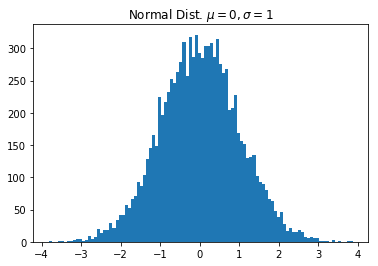

In [8]:
plt.hist(x, 100)
plt.title("Normal Dist. $\mu=0, \sigma=1$")
plt.savefig("matplotlib_hist.png")
plt.show()

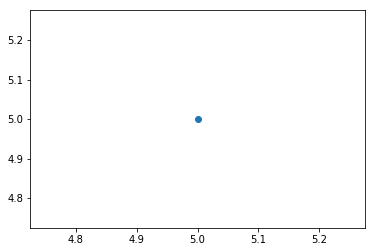

In [9]:
plt.plot(5,5,"o")
plt.show()

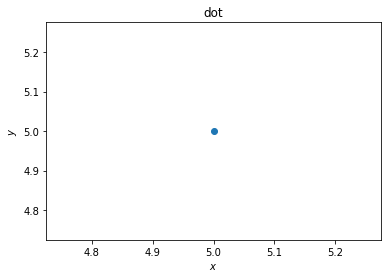

In [10]:
plt.plot(5,5,"o")
plt.title("dot")
plt.xlabel("$x$")
plt.ylabel("$y$")

### Read Data

In [11]:
import pandas as pd
from __future__ import print_function

In [12]:
# df = pd.read_excel("https://ibm.box.com/shared/static/lw190pt9zpy5bd1ptyg2aw15awomz9pu.xlsx", 
#                    sheetname="Canada by Citizenship", 
#                    skiprows=range(20), 
#                    skip_footer=2)
# df.to_csv("data/immigrants_df.csv", index=False)

In [13]:
df = pd.read_csv("data/immigrants_df.csv").set_index("OdName", drop=True)
df.index.name="Country"
df.head(2)

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1450,1223,856,702,560,716,561,539,620,603


### Plotting with Pandas:

In [14]:
# !pip install xlrd

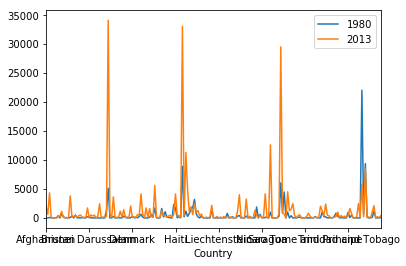

In [15]:
df[["1980", "2013"]].plot(kind="line")

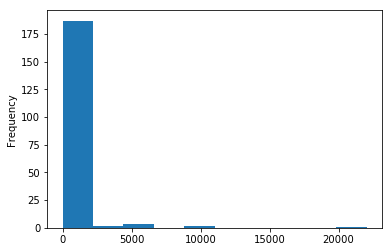

In [16]:
df["1980"].plot(kind="hist")

### Line Plots

In [17]:
import matplotlib as mpl
import seaborn as sns

C:\ProgramData\Anaconda3\envs\tf_keras_gensim_xgb\lib\site-packages\IPython\html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


In [18]:
years = list(map(str, range(1980, 2014)))
print(years)

['1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']


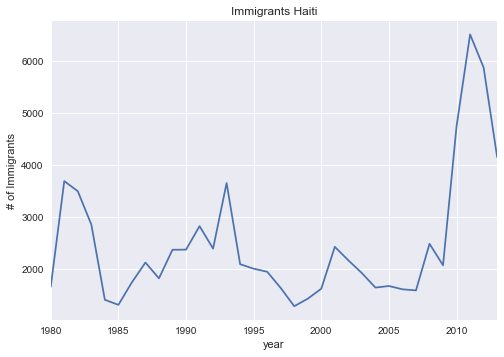

In [19]:
df.loc["Haiti", years].plot(kind="line")
plt.title("Immigrants Haiti")
plt.ylabel("# of Immigrants")
plt.xlabel("year")
plt.grid(which='minor', axis='both')
plt.show()

### Area Plots:

In [20]:
df["Total"] = df[years].sum(axis=1)
df.head()

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,16,39,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,1,0,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Immigrants,Foreigners,903,Africa,912,Northern Africa,902,Developing regions,80,67,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Immigrants,Foreigners,909,Oceania,957,Polynesia,902,Developing regions,0,1,...,0,1,0,0,0,0,0,0,0,6
Andorra,Immigrants,Foreigners,908,Europe,925,Southern Europe,901,Developed regions,0,0,...,0,1,1,0,0,0,0,1,1,15


In [21]:
df.sort_values(["Total"], ascending=False, axis=0, inplace=True)
df.head(2)

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Immigrants,Foreigners,935,Asia,5501,Southern Asia,902,Developing regions,8880,8670,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Immigrants,Foreigners,935,Asia,906,Eastern Asia,902,Developing regions,5123,6682,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962


In [22]:
df_top5 = df.head()[years].T
df_top5.head(3)

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201


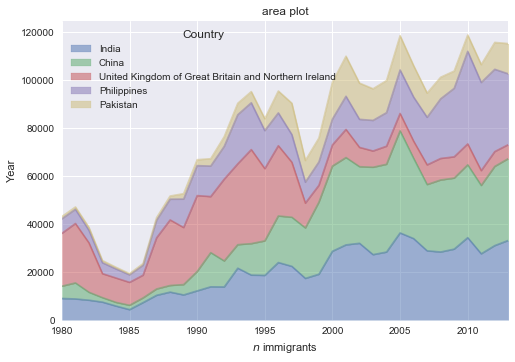

In [23]:
df_top5.plot(kind="area", alpha=0.5)
plt.title("area plot")
plt.xlabel("$n$ immigrants")
plt.ylabel("Year")

plt.show()

### Histogram:

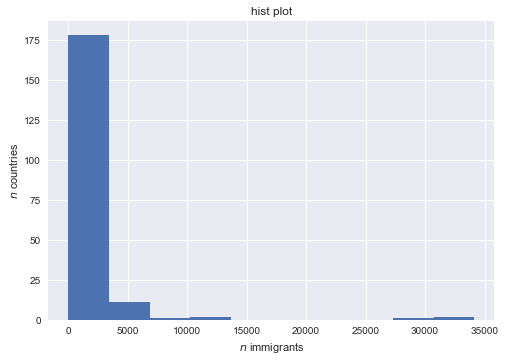

In [24]:
df["2013"].plot(kind="hist")
plt.title("hist plot")
plt.xlabel("$n$ immigrants")
plt.ylabel("$n$ countries")

plt.show()

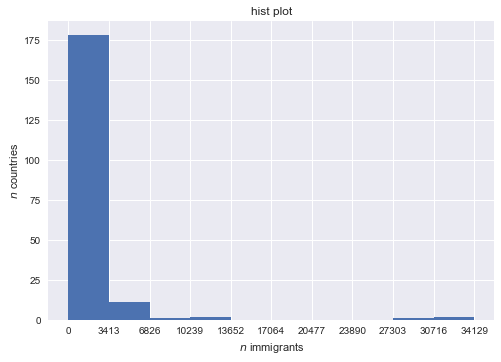

In [25]:
# in order to align the bins edges with tick-marks:
count, bin_edges = np.histogram(df["2013"])

df["2013"].plot(kind="hist", xticks=bin_edges)
plt.title("hist plot")
plt.xlabel("$n$ immigrants")
plt.ylabel("$n$ countries")

plt.show()

### Bar-Charts:

In [26]:
df_iceland = df.loc["Iceland", years]

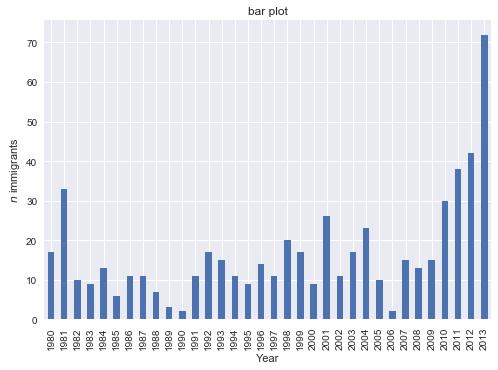

In [27]:
df_iceland.plot(kind="bar")
plt.title("bar plot")
plt.xlabel("Year")
plt.ylabel("$n$ immigrants")

plt.show()

### Pie Charts:

In [28]:
df_continents = df.groupby("AreaName", axis=0).sum()

In [29]:
df_continents[years]

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
AreaName,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


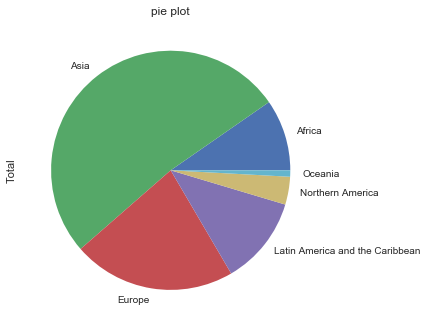

In [30]:
df_continents["Total"].plot(kind="pie")
plt.title("pie plot")

# equalize the aspect ratio
plt.gca().set_aspect('equal', adjustable='box')

plt.show()

### Box-Plot

In [31]:
df_japan = df.loc[["Japan"], years].T
df_japan.head(3)

Country,Japan
1980,701
1981,756
1982,598


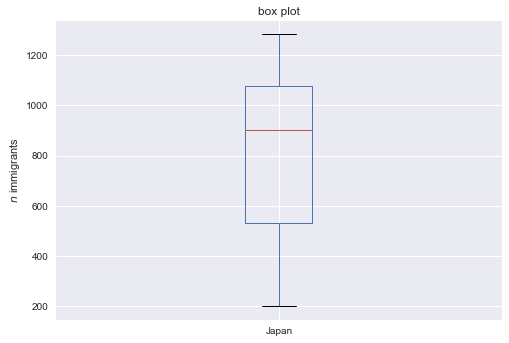

In [32]:
df_japan.plot(kind="box")
plt.title("box plot")
plt.ylabel("$n$ immigrants")

plt.show()

### Scatter Plot

In [33]:
# somehow, simply changing the col names makes scatter-plot not to recognize the columns. so this is an ugly hack
df_years = df[years].sum().to_frame()
df_years.reset_index(inplace=True, drop=False)
df_years.columns = ["year", "total"]
df_years.head(3)
df_years.to_csv("data/df_years.csv", index=False)
df_years = pd.read_csv("data/df_years.csv")

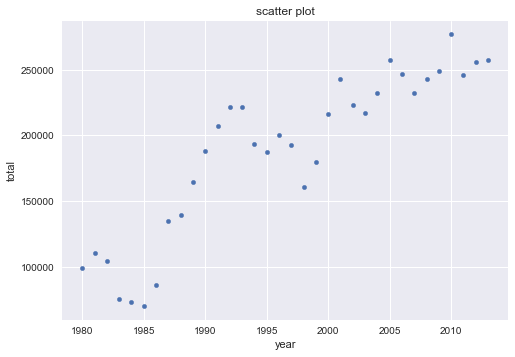

In [34]:
df_years.plot(kind="scatter", x="year", y="total")
plt.title("scatter plot")

plt.show()

### Waffle Charts

Mainly to display progress towards goals.  
more contribution = more tiles

In [35]:
df_3 = df.loc[["Denmark", "Norway", "Sweden"]]
df_3

,Type,Coverage,AREA,AreaName,REG,RegName,DEV,DevName,1980,1981,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,272,293,...,62,101,97,108,81,92,93,94,81,3901
Norway,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,116,77,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Immigrants,Foreigners,908,Europe,924,Northern Europe,901,Developed regions,281,308,...,205,139,193,165,167,159,134,140,140,5866


In [36]:
import matplotlib.pyplot as plt
from pywaffle import Waffle

In [37]:
data = (df_3["Total"]//100).to_dict()
data

{'Denmark': 39, 'Norway': 23, 'Sweden': 58}

In [38]:
data_vals = np.array(list(data.values()))
data_vals

array([58, 39, 23], dtype=int64)

In [39]:
# option1:
colors = ("#232066", "#983D3D", "#DCB732")

# option3:
cmap = mpl.cm.Accent
mini, maxi = data_vals.min(), data_vals.max()
norm = mpl.colors.Normalize(vmin=mini, vmax=maxi)
colors = [cmap(norm(value)) for value in data_vals]

# option2:
# from: https://matplotlib.org/examples/color/named_colors.html
colors = ("sienna", "grey", "cornflowerblue")

colors

('sienna', 'grey', 'cornflowerblue')

In [40]:
# available icons from: https://fontawesome.com/icons?from=io
icon = "apple"
icon = "child"
icon = "male"
icon = None

In [41]:
legend_loc = {'loc': 'upper left', 'bbox_to_anchor': (1, 1)}

C:\ProgramData\Anaconda3\envs\tf_keras_gensim_xgb\lib\site-packages\matplotlib\figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


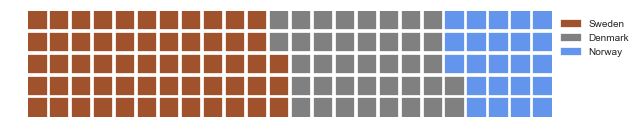

In [42]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    values=data, 
    colors=colors,
    legend=legend_loc,
    icons=icon, 
    icon_size=18, 
    icon_legend=True
)

### Word Clouds

- a word's size according to its freq in the text
- e.g., find most common words in text for labeling etc.

In [43]:
from wordcloud import WordCloud
import re
import multidict
# examples of how to use it: https://github.com/amueller/word_cloud/tree/master/examples

In [44]:
# get some text (Alice in Wonderland):
from urllib import request
url = "http://www.gutenberg.org/files/11/11-0.txt"
response = request.urlopen(url)
text = response.read().decode('utf8')
text = " ".join(text.split())

In [45]:
wc = WordCloud(background_color="black", max_words=1000)

(-0.5, 399.5, 199.5, -0.5)

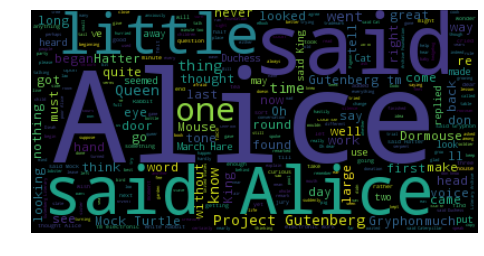

In [46]:
wordcloud = wc.generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

### Seaborn and Regression Plots:

In [47]:
df_japan = df.loc[["Japan"], years].T
df_japan = df_japan.reset_index()
df_japan.index.name = "index"
df_japan.columns = ["Year", "Number"]

# same infantil bug - so we save to csv and re-read it:
df_japan.to_csv("data/df_japan.csv")
df_japan = pd.read_csv("data/df_japan.csv")

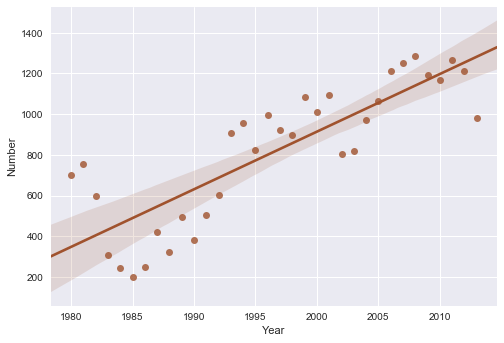

In [48]:
ax = sns.regplot(x="Year", y="Number", data=df_japan, color='sienna', marker="o") # inclides 95% interval

### Folium - for geo data

In [49]:
import folium # interactive maps...

In [50]:
world_map = folium.Map()
world_map

In [51]:
center_map = [56.130, -106.35] # for Canada
world_map = folium.Map(location=center_map, zoom_start=4)

world_map

#### with tiles:

In [52]:
center_map = [56.130, -106.35] # for Canada
# optional tiles here: https://github.com/python-visualization/folium/tree/master/folium/templates/tiles
# tiles = 'Stamen Toner'
# tiles = 'stamenterrain'
# tiles = 'openstreetmap'
# tiles="mapboxbright"
tiles="mapboxcontrolroom"
world_map = folium.Map(location=center_map, 
                       zoom_start=4,
                       tiles=tiles)

world_map

#### add markers to a map

In [64]:
center_map = [56.130, -106.35] # for Canada
tiles="mapboxcontrolroom"
canada_map = folium.Map(location=center_map, 
                       zoom_start=4,
                       tiles=tiles)

In [65]:
ontario = folium.map.FeatureGroup()

In [66]:
ontario_loc = [51.25, -85.32]
circle_radius = 8.
fill_color = "lightcoral"
color = "peachpuff"

ontario_circle = folium.CircleMarker(location=ontario_loc, 
                                     radius=circle_radius, 
                                     color=color, 
                                     fill_color=fill_color)

In [67]:
folium.Marker(ontario_loc, popup="Ontario").add_to(canada_map)

In [68]:
ontario.add_child(ontario_circle)

In [69]:
canada_map.add_child(ontario)

### Choropleth Maps